In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
from keras.utils import np_utils

In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

print('train data:', 'images:', x_img_train.shape,
                     'labels:', y_label_train.shape)
print(' test data:', 'images:', x_img_test.shape,
                     'labels:', y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
 test data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [3]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [26]:
model = Sequential(name='CNN')
model.add(Conv2D(filters=36, kernel_size=(5, 5),
                 input_shape=(32, 32, 3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=72, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=108, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 36)        2736      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 36)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 36)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 72)        23400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 72)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 72)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 108)         70092   

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [28]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=50, batch_size=1024, verbose=2)

Epoch 1/50
40/40 - 3s - loss: 1.9563 - accuracy: 0.2930 - val_loss: 1.7220 - val_accuracy: 0.4220
Epoch 2/50
40/40 - 1s - loss: 1.5172 - accuracy: 0.4548 - val_loss: 1.5465 - val_accuracy: 0.4812
Epoch 3/50
40/40 - 1s - loss: 1.3632 - accuracy: 0.5098 - val_loss: 1.5076 - val_accuracy: 0.4909
Epoch 4/50
40/40 - 1s - loss: 1.2702 - accuracy: 0.5472 - val_loss: 1.3741 - val_accuracy: 0.5545
Epoch 5/50
40/40 - 1s - loss: 1.1741 - accuracy: 0.5866 - val_loss: 1.2746 - val_accuracy: 0.5829
Epoch 6/50
40/40 - 1s - loss: 1.0857 - accuracy: 0.6161 - val_loss: 1.2159 - val_accuracy: 0.6159
Epoch 7/50
40/40 - 1s - loss: 1.0348 - accuracy: 0.6345 - val_loss: 1.1598 - val_accuracy: 0.6255
Epoch 8/50
40/40 - 1s - loss: 0.9740 - accuracy: 0.6563 - val_loss: 1.1117 - val_accuracy: 0.6425
Epoch 9/50
40/40 - 1s - loss: 0.9336 - accuracy: 0.6704 - val_loss: 1.1191 - val_accuracy: 0.6270
Epoch 10/50
40/40 - 1s - loss: 0.8886 - accuracy: 0.6895 - val_loss: 1.0625 - val_accuracy: 0.6428
Epoch 11/50
40/40 -

In [8]:
import matplotlib.pyplot as plt
def show_train_history(tr_history, train, valid):
    plt.plot(tr_history.history[train])
    plt.plot(tr_history.history[valid])
    plt.title('Train History')
    plt.xlabel('epoch'); plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')

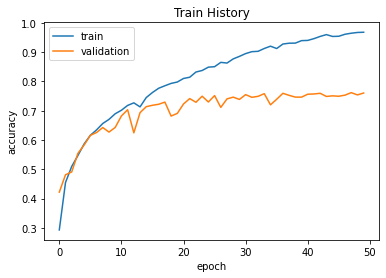

In [29]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

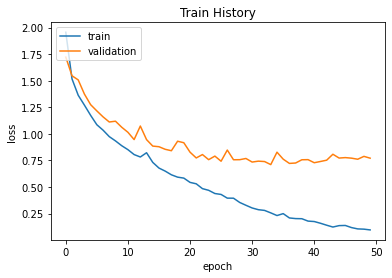

In [30]:
show_train_history(train_history, 'loss', 'val_loss')

In [41]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print('loss =', scores[0])
print('accuracy =', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.7787 - accuracy: 0.7566
lose = 0.7786931395530701
accuracy = 0.756600022315979


In [32]:
prediction = model.predict_classes(x_img_test_normalize)

D:\Program Files\anaconda\envs\tensorflow\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
              5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
def plot_image_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        title = str(i) + '. ' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += ' => ' + label_dict[labels[i][0]]
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

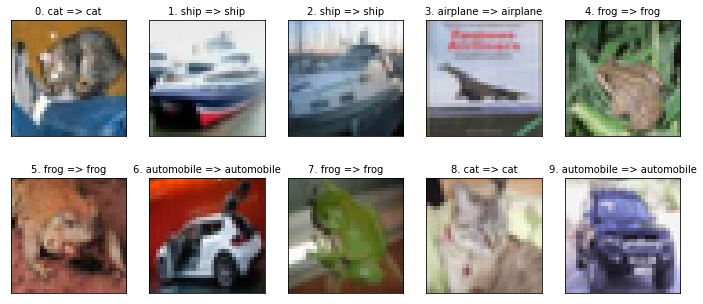

In [34]:
plot_image_labels_prediction(x_img_test, y_label_test, prediction, 0)

In [35]:
predicted_probability = model.predict(x_img_test_normalize)

In [36]:
def show_predicted_probability(y, prediction,
                               x_img, predicted_probability, i):
    print('label:', label_dict[y[i][0]],
          'predict:', label_dict[prediction[i]])
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + 
              ' probability: %1.9f' % predicted_probability[i][j])

label: cat predict: cat


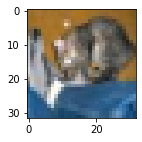

airplane probability: 0.000032470
automobile probability: 0.000001270
bird probability: 0.000032149
cat probability: 0.992258012
deer probability: 0.000000223
dog probability: 0.007357721
frog probability: 0.000026166
horse probability: 0.000006428
ship probability: 0.000278846
truck probability: 0.000006681


In [38]:
show_predicted_probability(y_label_test, prediction,
                           x_img_test, predicted_probability, 0)

In [39]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction,
            rownames=['label'], colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,777,16,77,12,16,5,9,9,54,25
1,10,880,9,5,2,6,9,2,14,63
2,46,5,749,32,50,59,37,12,6,4
3,22,18,128,515,49,152,65,23,7,21
4,15,4,113,43,680,47,45,40,7,6
5,12,4,63,139,40,683,26,23,3,7
6,3,7,53,38,22,26,840,2,3,6
7,18,4,45,33,52,65,4,766,3,10
8,38,29,21,9,3,9,4,3,873,11


In [40]:
model.save('model/mdl_20220411.h5')